#TER ÉTAPE 5

In [17]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sbn
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
import numpy as np

#  1 - CLASSIFICATION 
DATASET : Planetes

---

In [18]:
bd = pd.read_csv("/Users/leolamoureux/FAC/TER/projet_TER_machine_learning/Datasets/phone_price.csv")
bd.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [28]:
bd['pc']

0        2
1        6
2        6
3        9
4       14
        ..
1995    14
1996     3
1997     3
1998     5
1999    16
Name: pc, Length: 2000, dtype: int64

In [19]:
#on vérifie si des données sont manquantes
bd.isnull().sum().sort_values(ascending=False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

In [20]:
#la cible est la catégorie de prix
target = bd['price_range']
bd.drop('price_range',axis=1,inplace=True)

In [30]:
algo = RandomForestClassifier()
X_train,X_test,y_train,y_test = train_test_split(bd,target, stratify = target, test_size = 0.2)
algo.fit(X_train,y_train)
print(f"précision test = {algo.score(X_test,y_test)*100:.2f}%")
print(f"précision train = {algo.score(X_train,y_train)*100:.2f}%")

précision test = 88.25%
précision train = 100.00%


In [36]:
array=[3,  3,  9,  9,  9,  9,  9,  9,  9,  9,  9,  0,  0,  9,  0,  9,  9,
  9,  0,  9,]
algo.predict([array])

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

précision moyenne de 87.85% avec marge d'erreur de 1.61%



<BarContainer object of 5 artists>

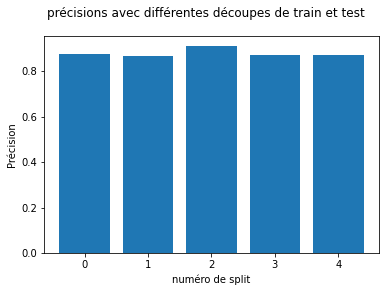

In [22]:
nb_cv = StratifiedKFold(5)

scores = cross_val_score(RandomForestClassifier(),bd,target, cv = nb_cv)
print(f"précision moyenne de {scores.mean()*100:.2f}% avec marge d'erreur de {scores.std()*100:.2f}%\n")
plt.suptitle("précisions avec différentes découpes de train et test")
plt.xlabel("numéro de split")
plt.ylabel("Précision")
plt.bar([0,1,2,3,4],scores)

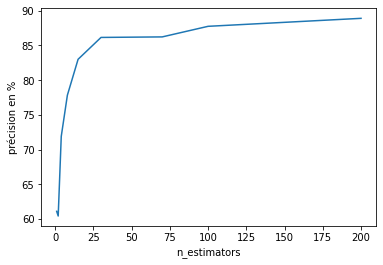

In [23]:
n_estimators = [1, 2, 4, 8, 15, 30, 70, 100, 200]
precisions = []
for i in n_estimators:
  moy = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(bd,target, test_size = 0.2)
    algo = RandomForestClassifier(n_estimators = i)
    algo.fit(X_train,y_train)
    moy.append(algo.score(X_test,y_test)*100)
  precisions.append(statistics.mean(moy))

plt.xlabel("n_estimators")
plt.ylabel("précision en %")
plt.plot(n_estimators, precisions)

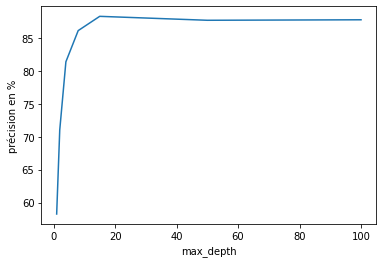

In [24]:
max_depth = [1, 2, 4, 8, 15, 50, 100]
precisions = []
for i in max_depth:
  moy = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(bd,target, test_size = 0.2)
    algo = RandomForestClassifier(max_depth = i)
    algo.fit(X_train,y_train)
    moy.append(algo.score(X_test,y_test)*100)
  precisions.append(statistics.mean(moy))

plt.xlabel("max_depth")
plt.ylabel("précision en %")
plt.plot(max_depth, precisions)

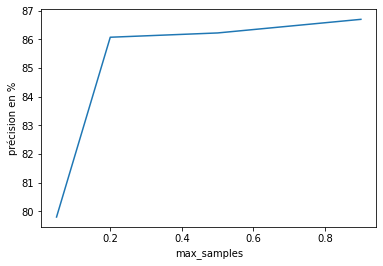

In [25]:
max_samples = [0.05,0.2,0.5,0.9] #pourcentage de la taille du dataset
precisions = []
for i in max_samples:
  moy = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(bd,target, test_size = 0.2)
    algo = RandomForestClassifier(max_samples = i)
    algo.fit(X_train,y_train)
    moy.append(algo.score(X_test,y_test)*100)
  precisions.append(statistics.mean(moy))

plt.xlabel("max_samples")
plt.ylabel("précision en %")
plt.plot(max_samples, precisions)

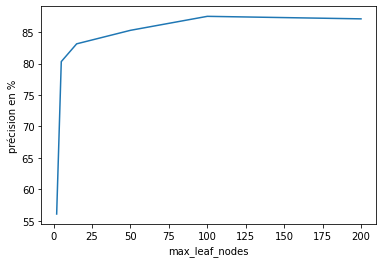

In [26]:
max_leaf_nodes = [2, 5, 15, 50, 100, 200]
precisions = []
for i in max_leaf_nodes:
  moy = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(bd,target, test_size = 0.2)
    algo = RandomForestClassifier(max_leaf_nodes = i)
    algo.fit(X_train,y_train)
    moy.append(algo.score(X_test,y_test)*100)
  precisions.append(statistics.mean(moy))

plt.xlabel("max_leaf_nodes")
plt.ylabel("précision en %")
plt.plot(max_leaf_nodes, precisions)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(bd,target, test_size = 0.2)
params = {'n_estimators' : [70, 80, 90, 100, 150, 200],
          'max_depth': [None, 10, 15, 20, 25, 50],
          'max_samples': [None, 0.8, 0.85, 0.9, 0.95],
          'max_leaf_nodes': [None, 80, 90, 100, 110, 150, 200]}

algo = GridSearchCV(RandomForestClassifier(), params, cv = 5)

algo.fit(X_train,y_train)
print(algo.best_params_)
print(f"précision test = {algo.score(X_test,y_test)}%")

print(f"accuracy_score :{accuracy_score(y_test,algo.predict(X_test))*100:.2f}% de prédictions correctes")
print(f"recall_score :{recall_score(y_test,algo.predict(X_test),average='micro')*100:.2f}% de positifs bien prédits par le modèle")

KeyboardInterrupt: 

#  2 - REGRESSION
DATASET : Prix des laptops

---

In [ ]:
pl = pd.read_csv("/Users/leolamoureux/FAC/TER/projet_TER_machine_learning/Datasets/laptop_price.csv",encoding='latin-1')
pl.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
#on vérifie si des données sont manquantes
pl.isnull().sum().sort_values(ascending=False)

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
#On remplace les valeurs catégorique par des valeurs numériques
for t in pl.columns:
 map_values={}
 cmpt = 0
 if pl[t].dtype == object:
  for i in pl[t].unique():
    map_values[i] = cmpt
    cmpt += 1
  pl[t] = pl[t].map(map_values)

<AxesSubplot:ylabel='Price_euros'>

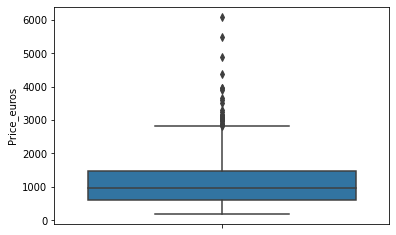

In [ ]:
#on voit qu'il y a des valeurs aberrantes
sbn.boxplot(y=pl['Price_euros'],data=pl)

In [ ]:
#fct qui trouve toutes les données aberrantes pour une colonne
def trouver_prix_aberrants(data,var):
  iqr=data[var].quantile(0.75)-data[var].quantile(0.25)
  Q1=data[var].quantile(0.25)
  Q3=data[var].quantile(0.75)
  upper=Q3+1.5*iqr
  lower=Q1-1.5*iqr
  return data[(data[var]<lower)|(data[var]>upper)].laptop_ID

In [ ]:
#on supprime les données aberrantes
aberrants = trouver_prix_aberrants(pl,'Price_euros').tolist()
len(aberrants)#peu nombreuse les enlever n'affectera pas le modèle

29

In [ ]:
while len(aberrants) != 0:
  aberrants = trouver_prix_aberrants(pl,'Price_euros').tolist()
  for i in aberrants:
    pl.drop(pl[pl['laptop_ID'] == i].index,inplace=True)

<AxesSubplot:ylabel='Price_euros'>

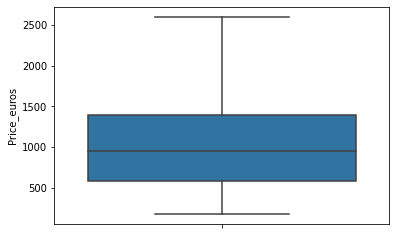

In [ ]:
#plus de valeurs aberrantes
sbn.boxplot(y=pl['Price_euros'],data=pl)

In [ ]:
#la cible à prédire c'est le prix du laptop
target = pl['Price_euros']
pl.drop('Price_euros',axis=1,inplace=True)
pl.drop('laptop_ID',axis=1,inplace=True)#inutile

In [ ]:
#Test du modèle avec les valeurs par default
X_train,X_test,y_train,y_test = train_test_split(pl,target, test_size = 0.2)
algo = RandomForestRegressor()
algo.fit(X_train,y_train)
print(f"précision avec les paramètres pas défault = {r2_score(y_test,algo.predict(X_test))*100:.2f}%")

précision avec les paramètres pas défault = 78.12%


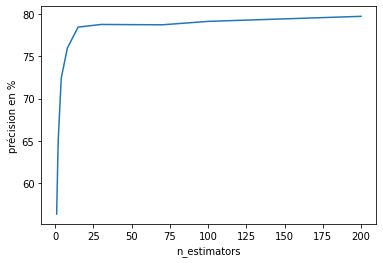

In [ ]:
n_estimators = [1, 2, 4, 8, 15, 30, 70, 100, 200]
precisions = []
for i in n_estimators:
  moy = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(pl,target, test_size = 0.2)
    algo = RandomForestRegressor(n_estimators = i)
    algo.fit(X_train,y_train)
    moy.append(r2_score(y_test,algo.predict(X_test))*100)
  precisions.append(statistics.mean(moy))

plt.xlabel("n_estimators")
plt.ylabel("précision en %")
plt.plot(n_estimators, precisions)

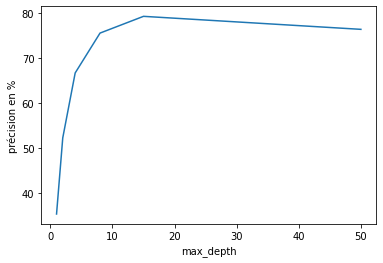

In [ ]:
max_depth = [1, 2, 4, 8, 15, 50]
precisions = []
for i in max_depth:
  moy = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(pl,target, test_size = 0.2)
    algo = RandomForestRegressor(max_depth = i)
    algo.fit(X_train,y_train)
    moy.append(r2_score(y_test,algo.predict(X_test))*100)
  precisions.append(statistics.mean(moy))

plt.xlabel("max_depth")
plt.ylabel("précision en %")
plt.plot(max_depth, precisions)

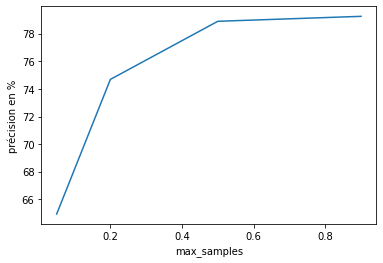

In [ ]:
max_samples = [0.05,0.2,0.5,0.9] #pourcentage de la taille du dataset
precisions = []
for i in max_samples:
  moy = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(pl,target, test_size = 0.2)
    algo = RandomForestRegressor(max_samples = i)
    algo.fit(X_train,y_train)
    moy.append(r2_score(y_test,algo.predict(X_test))*100)
  precisions.append(statistics.mean(moy))

plt.xlabel("max_samples")
plt.ylabel("précision en %")
plt.plot(max_samples, precisions)

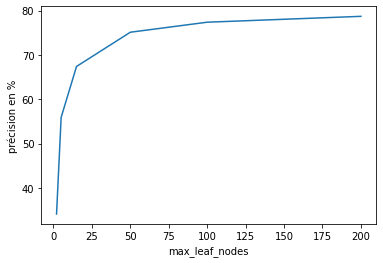

In [ ]:
max_leaf_nodes = [2, 5, 15, 50, 100, 200]
precisions = []
for i in max_leaf_nodes:
  moy = []
  for j in range(10):
    X_train,X_test,y_train,y_test = train_test_split(pl,target, test_size = 0.2)
    algo = RandomForestRegressor(max_leaf_nodes = i)
    algo.fit(X_train,y_train)
    moy.append(r2_score(y_test,algo.predict(X_test))*100)
  precisions.append(statistics.mean(moy))

plt.xlabel("max_leaf_nodes")
plt.ylabel("précision en %")
plt.plot(max_leaf_nodes, precisions)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(pl,target, test_size = 0.2)
params = {'n_estimators' : [70, 80, 90, 100, 150, 200],
          'max_depth': [None, 10, 15, 20, 25, 50],
          'max_samples': [None, 0.8, 0.85, 0.9, 0.95],
          'max_leaf_nodes': [None, 80, 90, 100, 110, 150, 200]}

algo = GridSearchCV(RandomForestRegressor(), params, cv = 5)

algo.fit(X_train,y_train)
print(algo.best_params_)
print(f"précision test = {algo.score(X_test,y_test)}%")

RMSE = math.sqrt(mean_squared_error(y_test,algo.predict(X_test)))
print(f"RMSE = {RMSE:.2f}, moyenne des observation = {statistics.mean(y_test):.2f}")
print(f"RMSE correspond à {(RMSE*100) / statistics.mean(y_test):.2f}% des observations\n")
print(f"r2_score = {r2_score(y_test,algo.predict(X_test))*100:.2f}%")

{'max_depth': None, 'max_leaf_nodes': None, 'max_samples': None, 'n_estimators': 200}
précision test = 0.7800077702012084%
RMSE = 260.22, moyenne des observation = 1052.93
RMSE correspond à 24.71% des observations

r2_score = 78.00%
